[IPython Notebook](binary_pulsations.ipynb) |  [Python Script](binary_pulsations.py)

Binary with Pulsations
============================

**NOTE: pulsations are currently being tested but not yet supported**

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Adding Pulsations
---------------------

Let's add one pulsation to each of our stars in the binary.

A pulsation is a feature, and needs to be attached directly to a component upon creation.  Providing a tag for 'feature' is entirely optional - if one is not provided it will be created automatically.

In [2]:
b.add_feature('pulsation', component='primary', feature='puls01')

<ParameterSet: 5 parameters | qualifiers: freq, radamp, m, teffext, l>

In [3]:
#b.add_feature('pulsation', component='secondary', feature='puls02')

Pulsation Parameters
-----------------

Pulsations are defined by a frequency and amplitude

In [4]:
print b['puls01']

ParameterSet: 5 parameters
           radamp@puls01@feature: 0.1
             freq@puls01@feature: 1.0 1 / d
                l@puls01@feature: 1.0
                m@puls01@feature: 1.0
          teffext@puls01@feature: False


In [5]:
b.set_value(qualifier='l', feature='puls01', value=0)

In [6]:
b.set_value(qualifier='m', feature='puls01', value=0)

In [7]:
b.add_dataset('LC', time=np.linspace(0,3,21))

<ParameterSet: 18 parameters | methods: LC, LC_dep>

In [8]:
b.run_compute(store_mesh=True)

/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/universe.py:2495: ComplexWarning: Casting complex values to real discards the imaginary part
  new_coords[:,0] = coords_for_observations[:,0] + xi_r * np.sin(theta) * np.cos(phi)
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/universe.py:2496: ComplexWarning: Casting complex values to real discards the imaginary part
  new_coords[:,1] = coords_for_observations[:,1] + xi_r * np.sin(theta) * np.sin(phi)
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/universe.py:2497: ComplexWarning: Casting complex values to real discards the imaginary part
  new_coords[:,2] = coords_for_observations[:,2] + xi_r * np.cos(theta)


<ParameterSet: 1336 parameters | methods: MESH, LC>


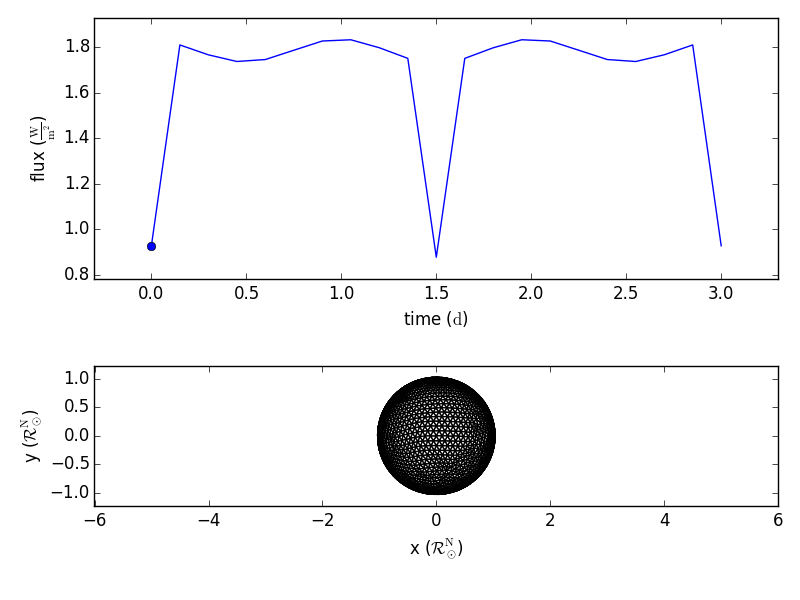
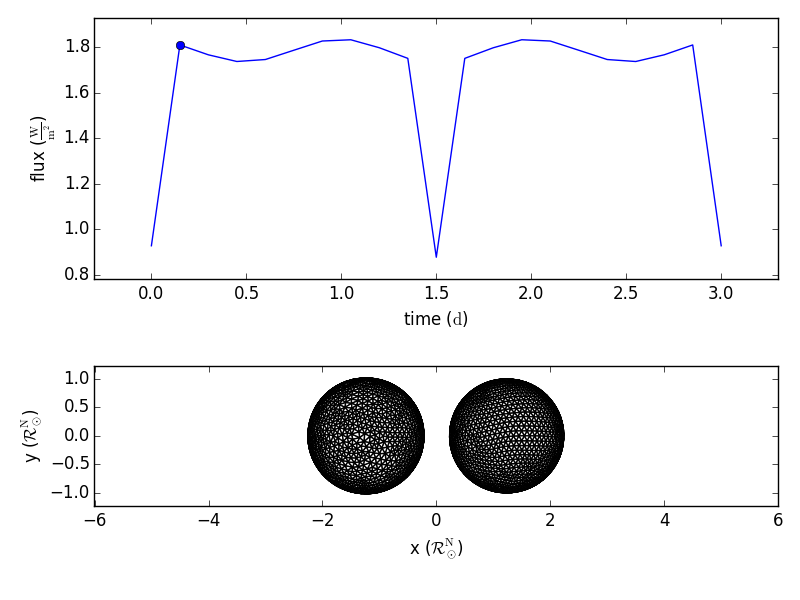
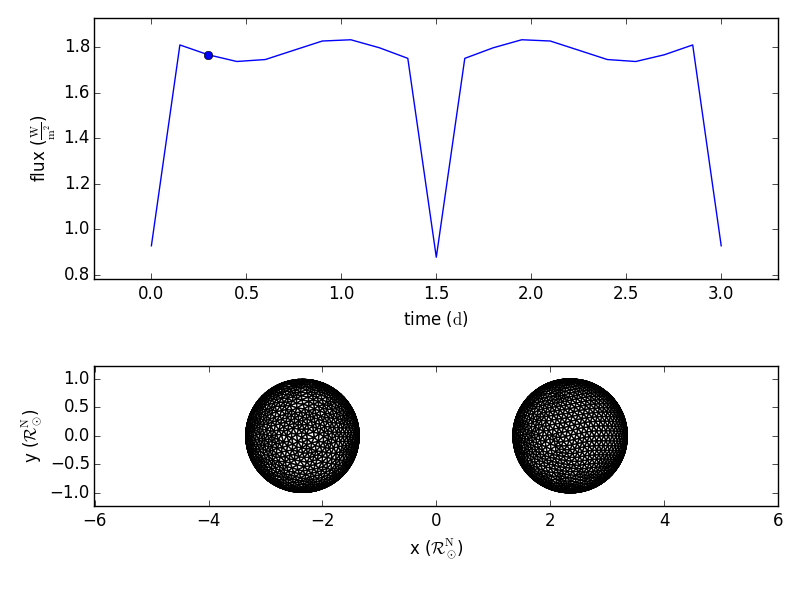
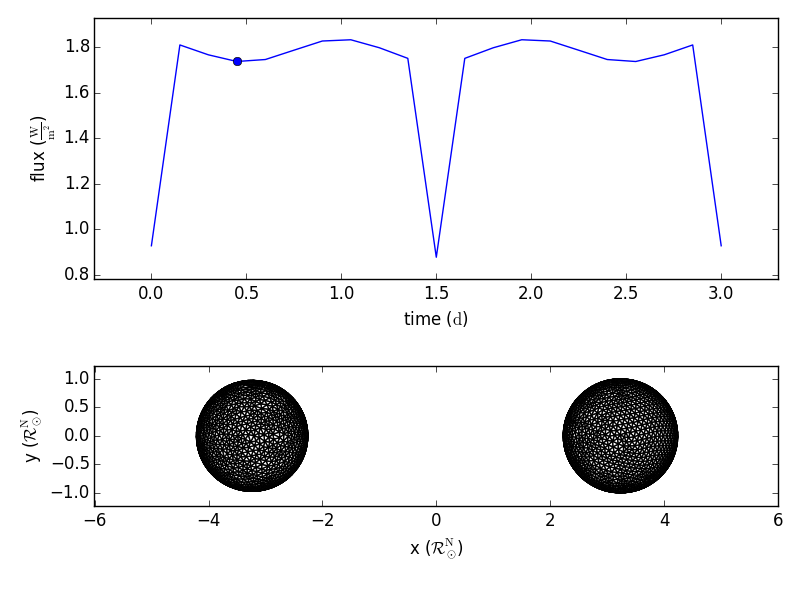
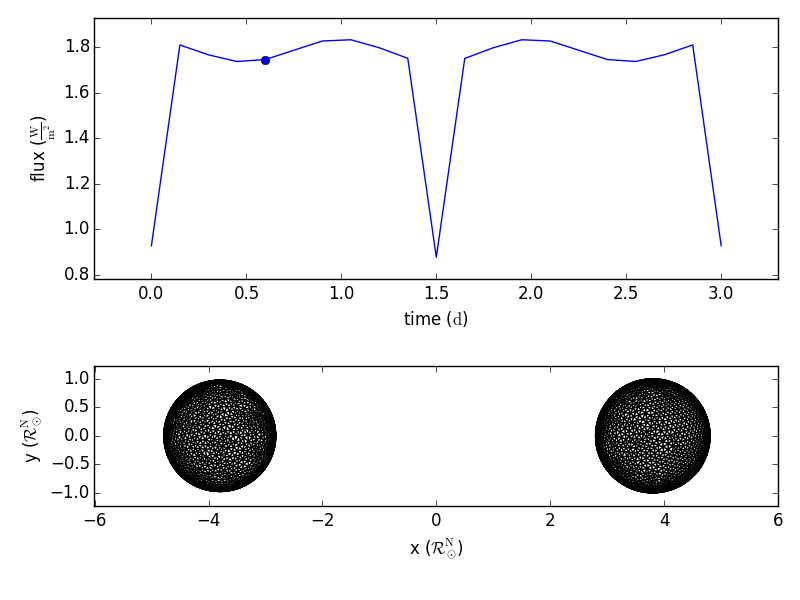
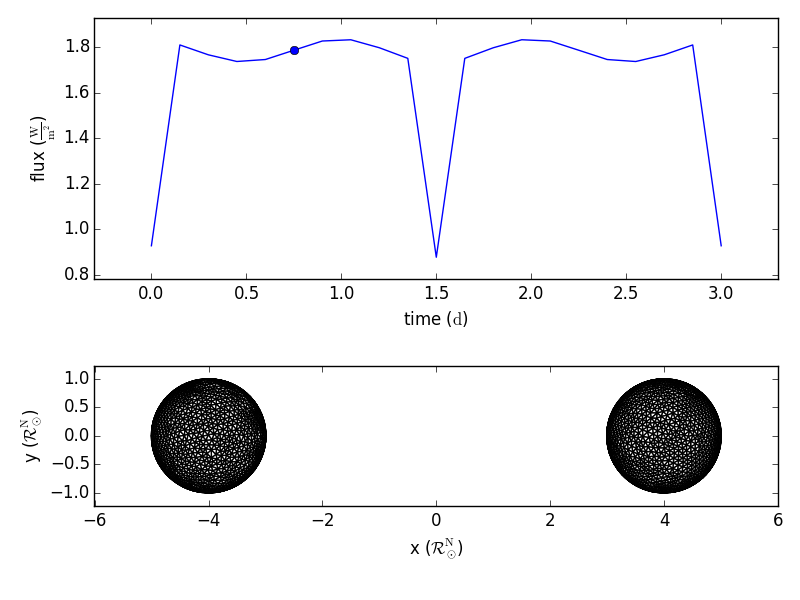
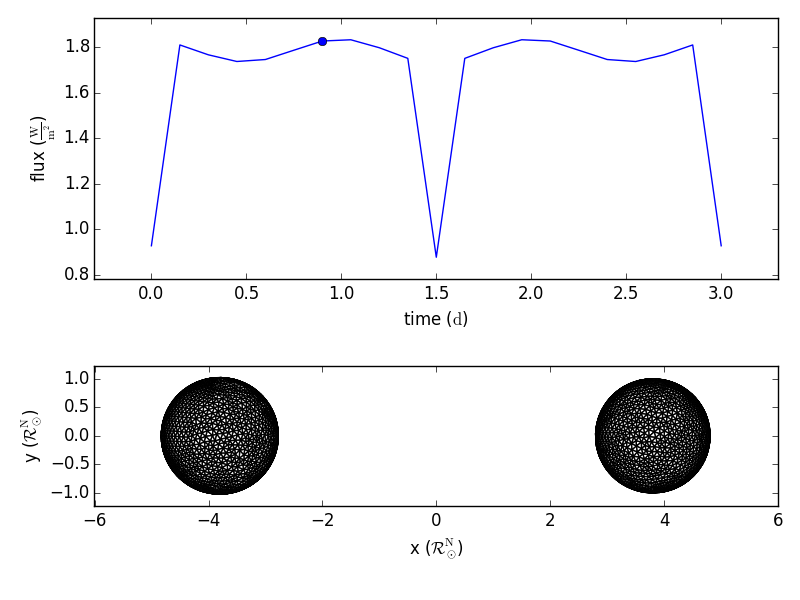
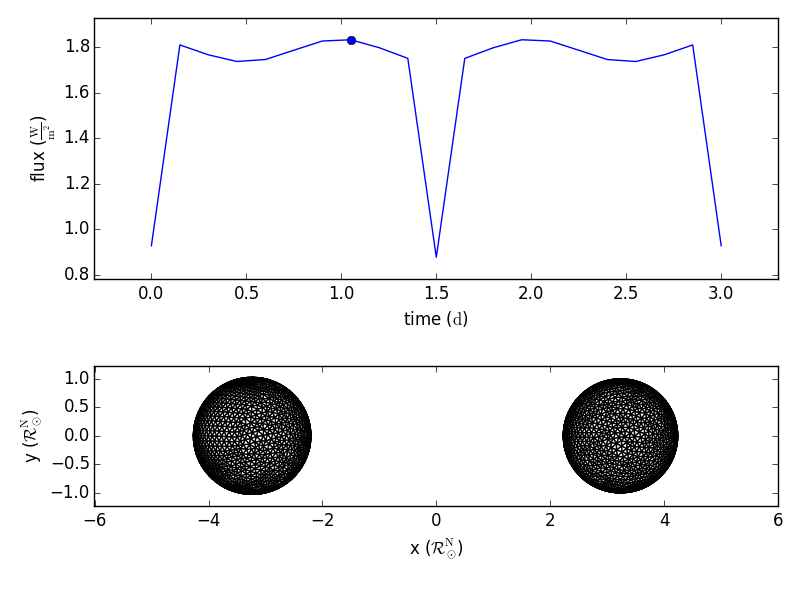
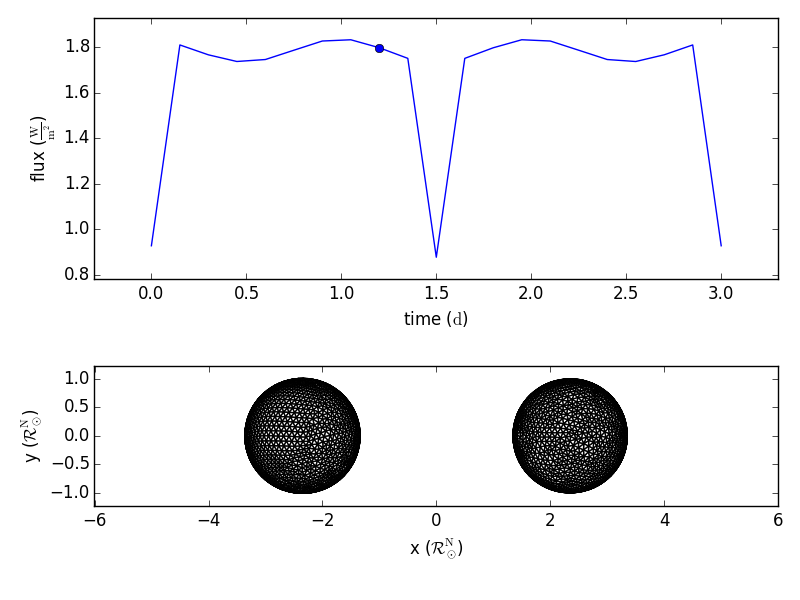
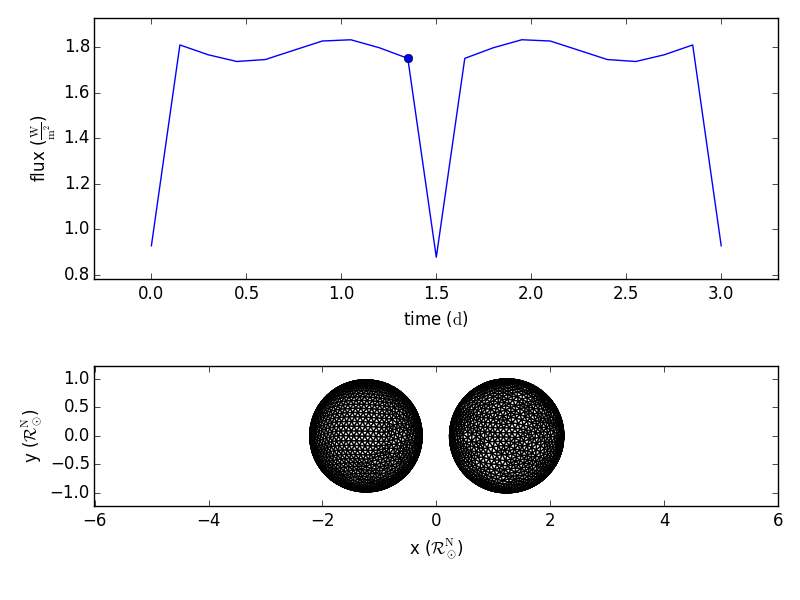
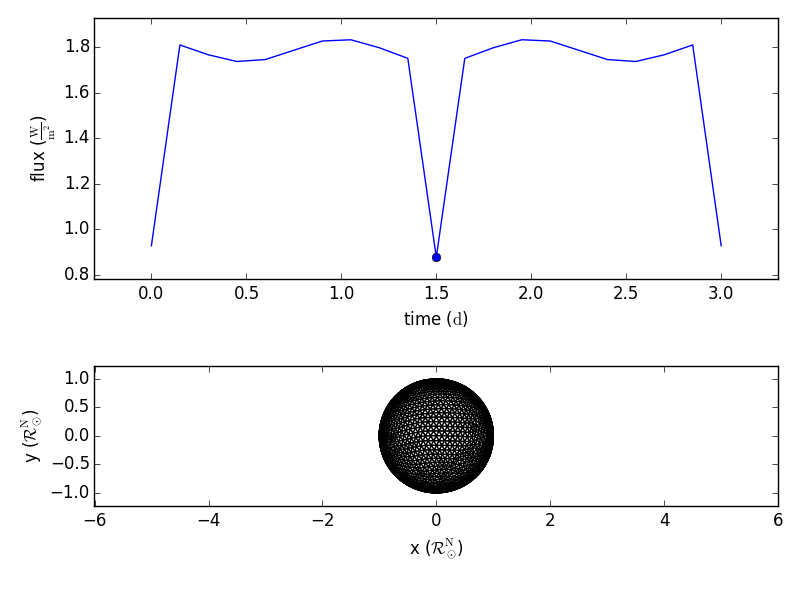
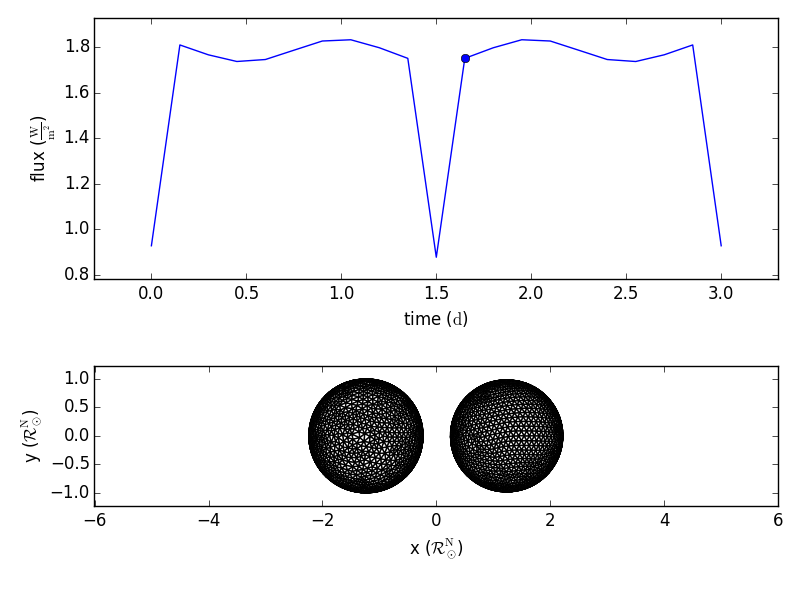
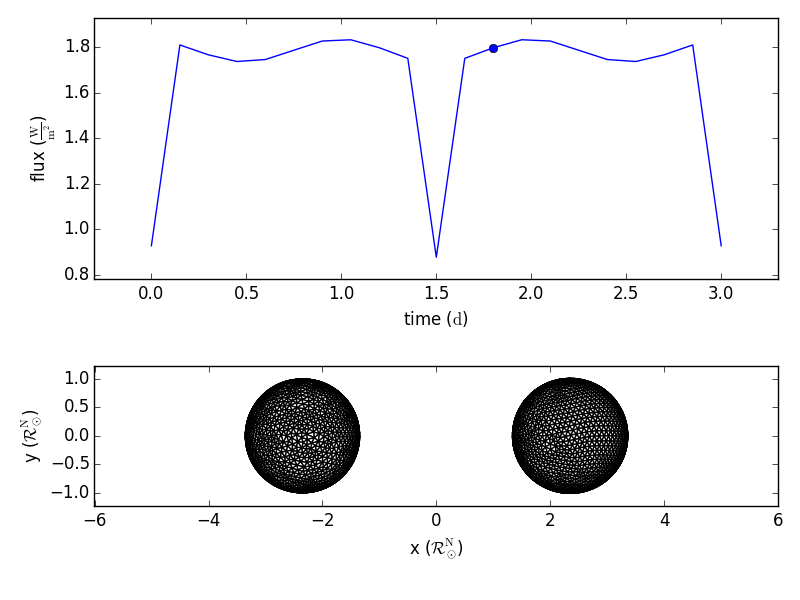
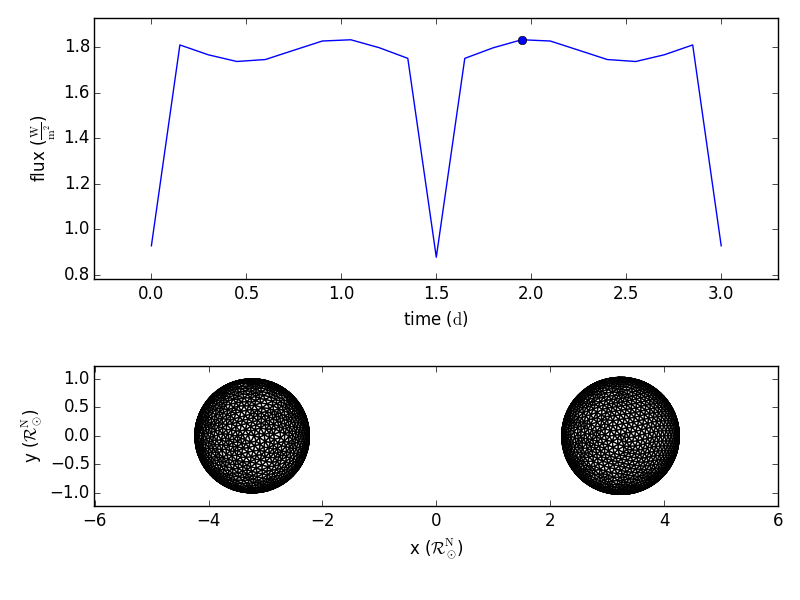
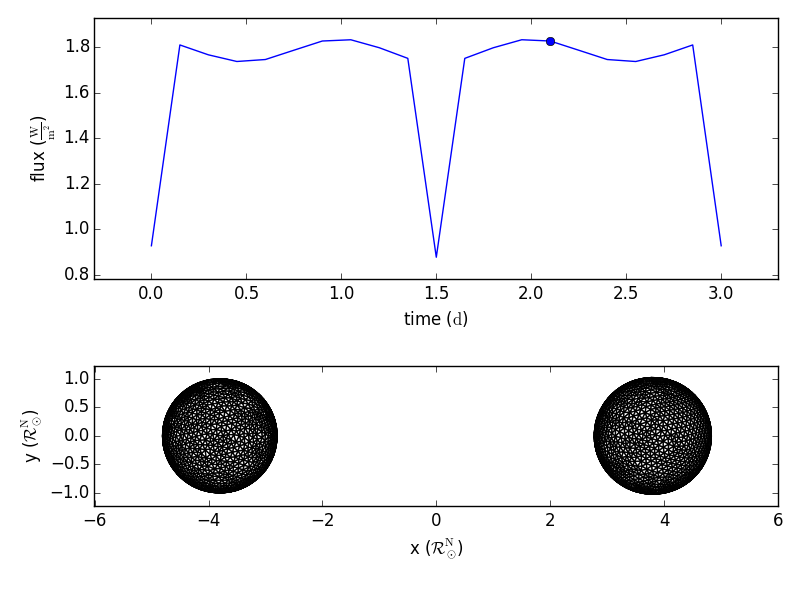
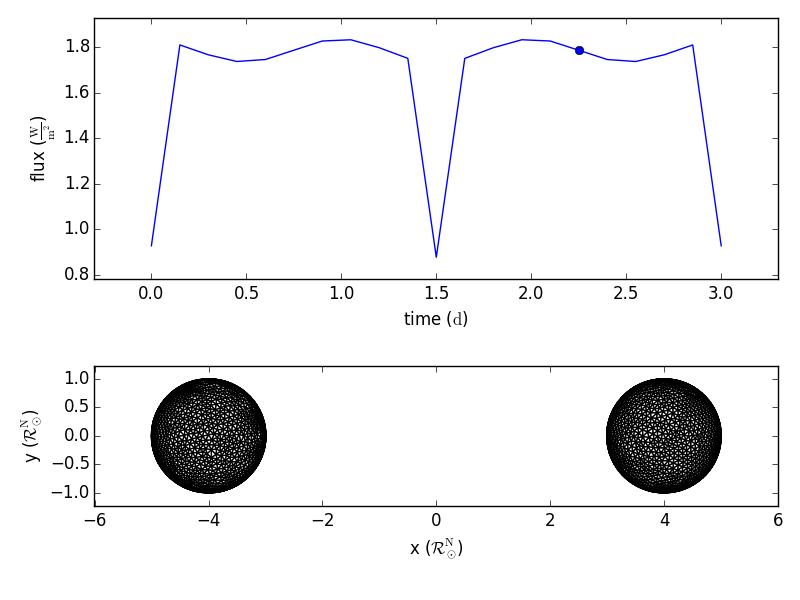
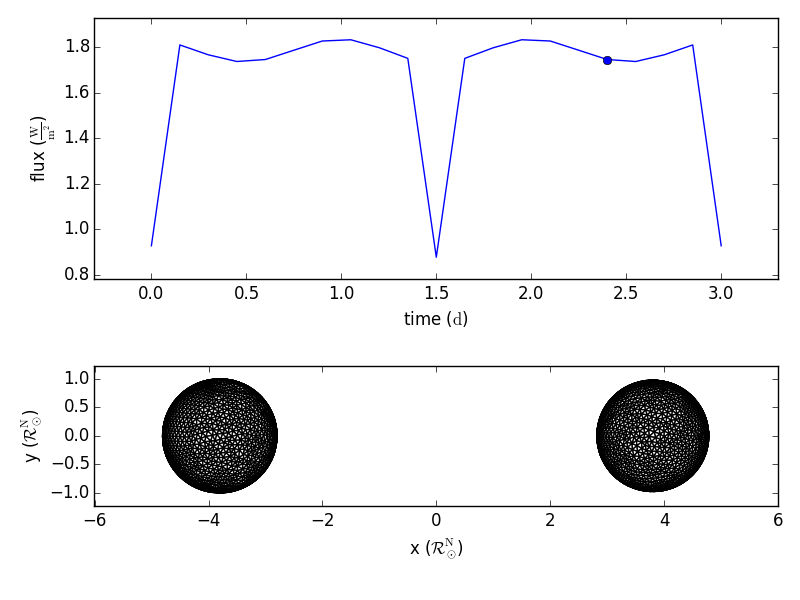
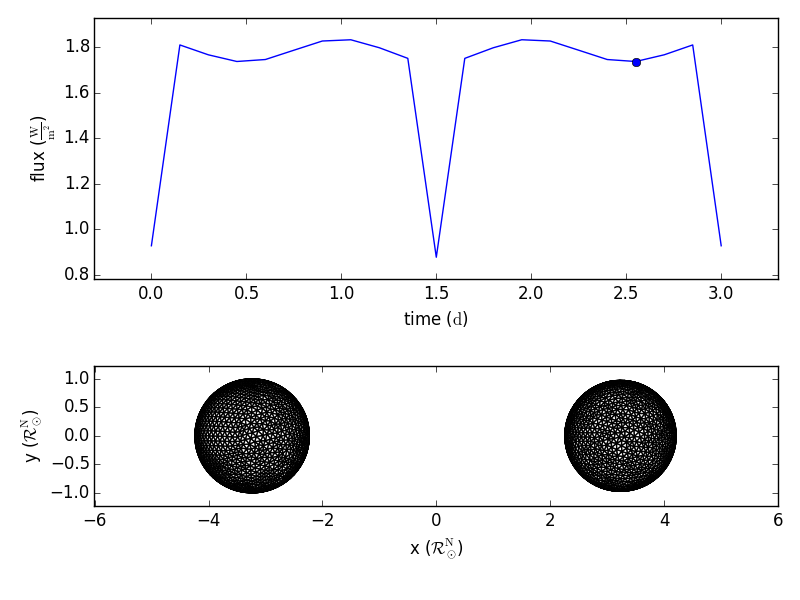
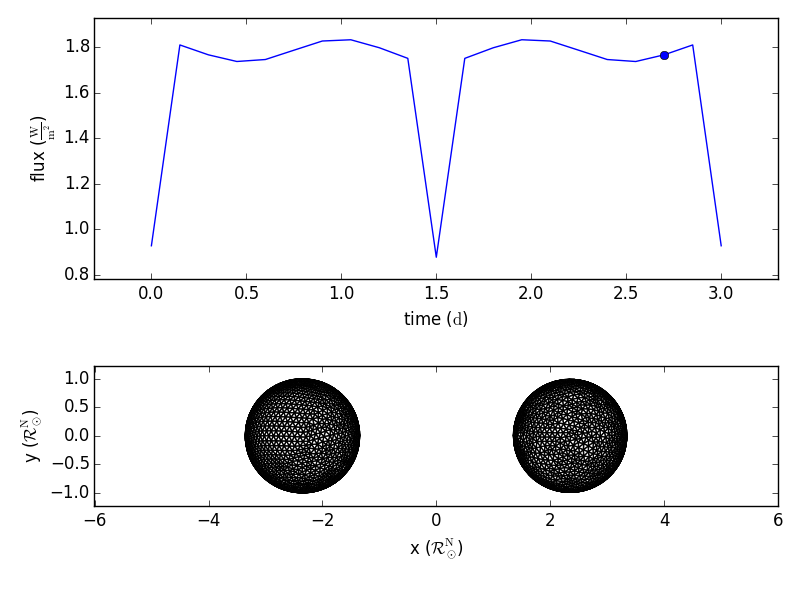
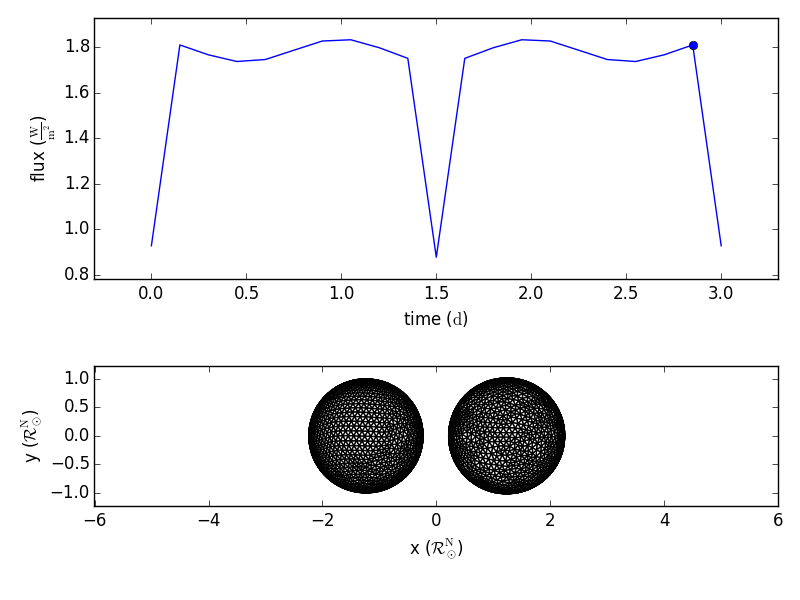
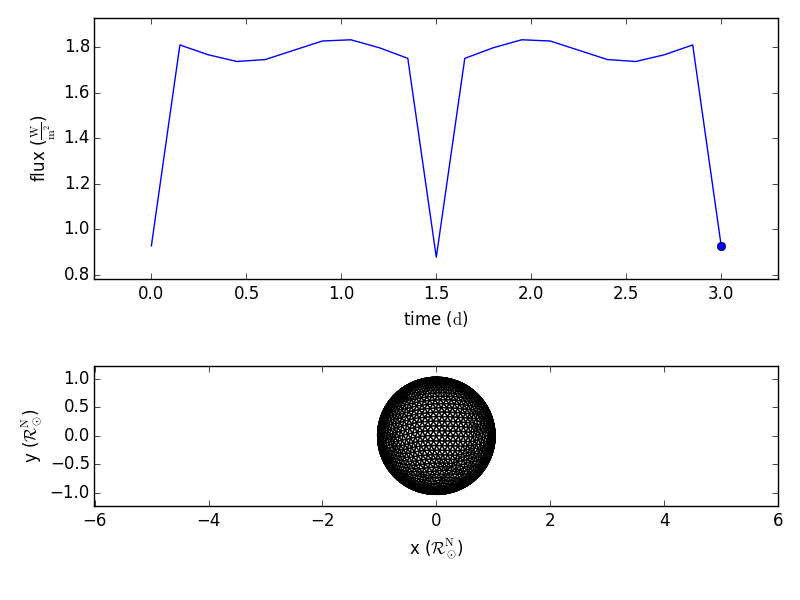

In [10]:
plt.clf()
b['model'].animate()